# Introduction to Seaborn

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices.csv', index_col='Date', parse_dates=True
)

quakes = pd.read_csv('data/earthquakes.csv')

## Categorical data

### `stripplot()`
The `stripplot()` function helps us visualize categorical data on one axis and numerical data on the other. We also now have the option of coloring our points using a column of our data (with the `hue` parameter). Using a strip plot, we can see points for each earthquake that was measured with a given `magType` and what its magnitude was; however, it isn't too easy to see density of the points due to overlap:

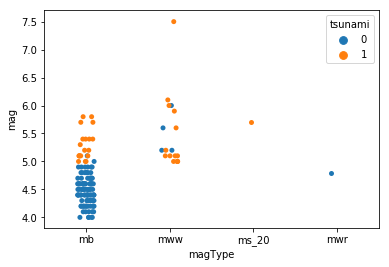

In [2]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

### `swarmplot()`
The bee swarm plot helps address this issue be keeping the points from overlapping. Notice how many more points we can see for the blue section of the `mb` `magType`:

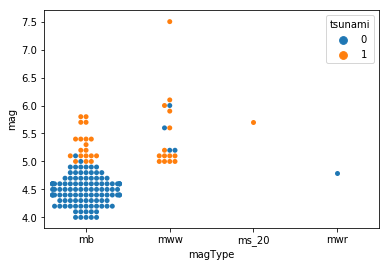

In [3]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

## Correlations and Heatmaps

### `heatmap()`
Last chapter, we saw how to create a correlation matrix heatmap using `pandas` and `matplotlib`. An easier way is to use `seaborn`:

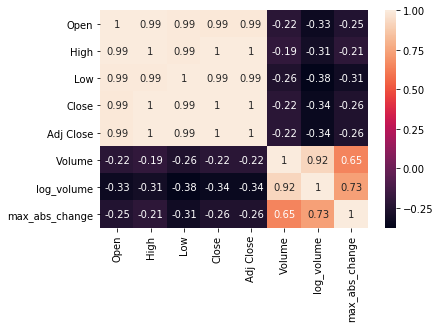

In [4]:
sns.heatmap(
    fb.sort_index().assign(
    log_volume=np.log(fb.Volume),
    max_abs_change=fb.High - fb.Low
).corr(),
    annot=True
)

### `pairplot()`
The pair plot is seaborn's answer to the scatter matrix we saw in chapter 5 (`pandas.plotting.scatter_matrix()`):

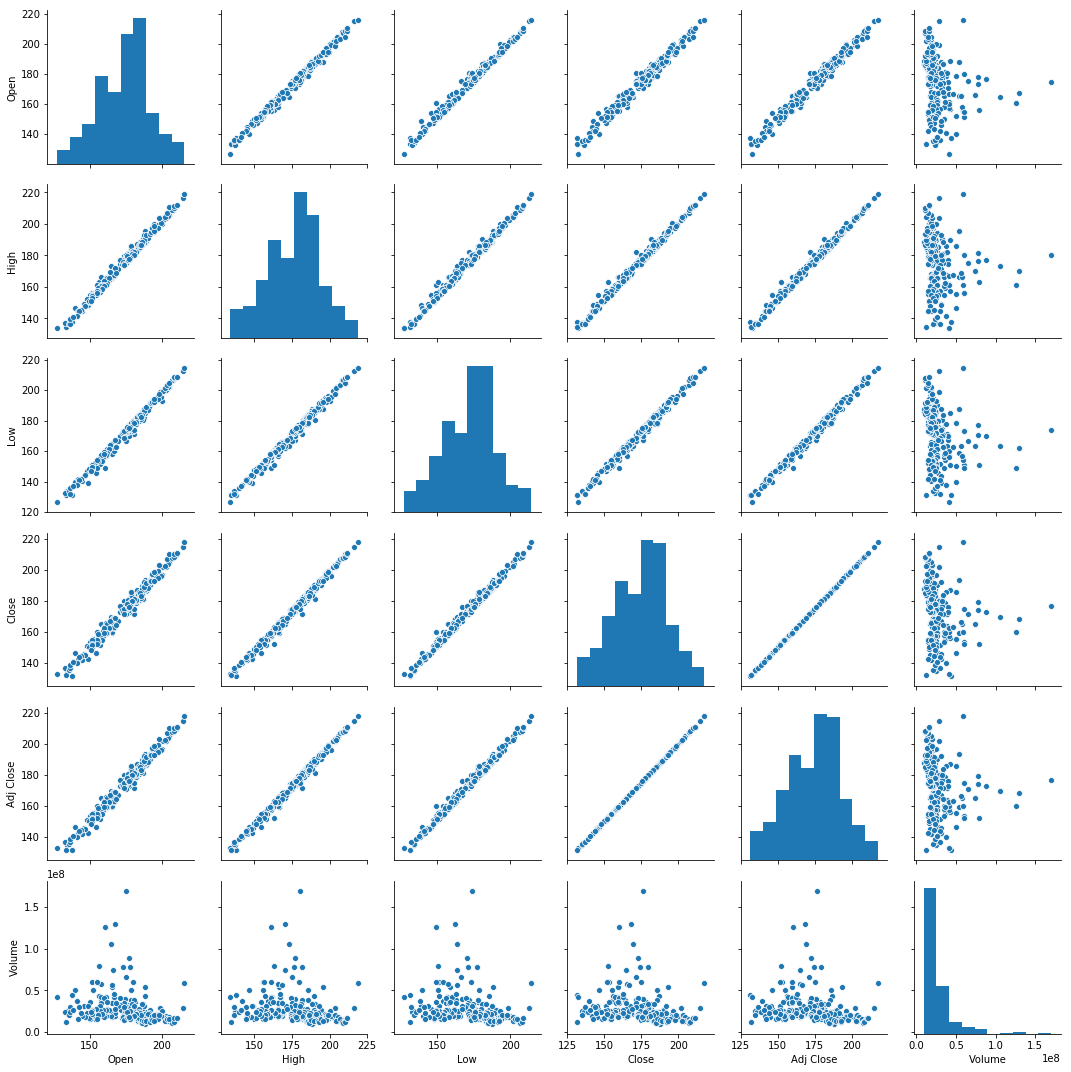

In [5]:
sns.pairplot(fb)

Just as with `pandas` we can specify what to show along the diagonal; however, `seaborn` also allows us to color the data based on another column (or other data with the same shape):

c:\users\molinstefanie\packt\venv\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\molinstefanie\packt\venv\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
c:\users\molinstefanie\packt\venv\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


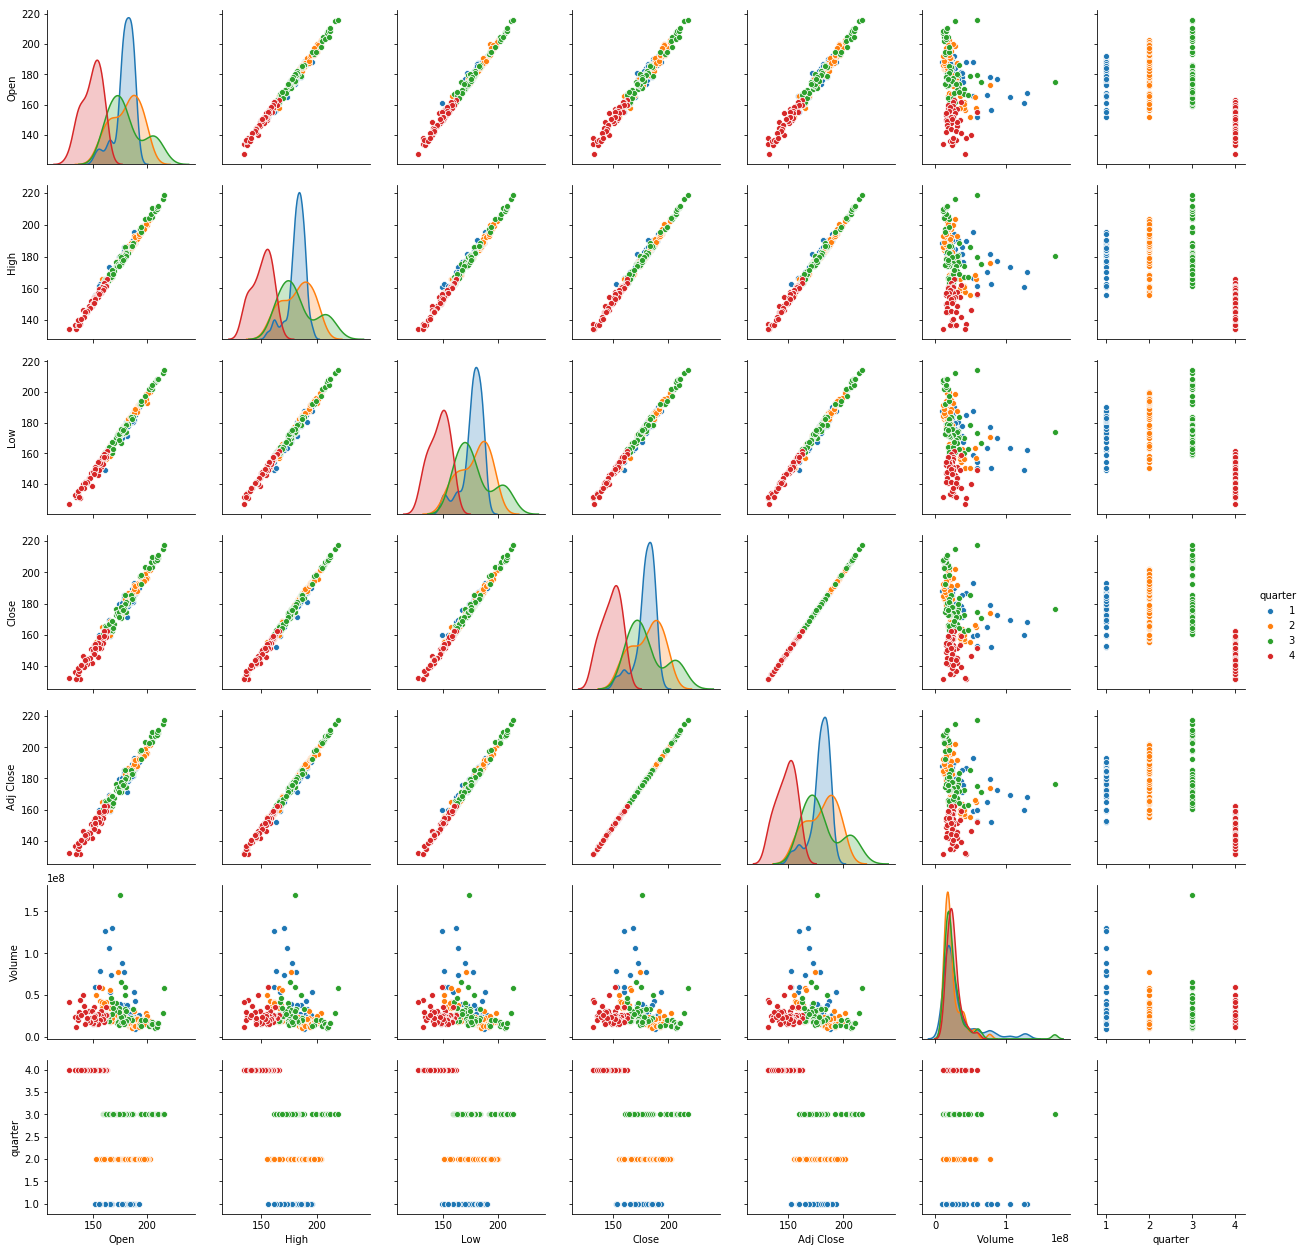

In [6]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

### `jointplot()`
The joint plot allows us to visualize the relationship between two variables, like a scatter plot. However, we get the added benefit of being able to visualize their distributions at the same time (as a histogram or KDE). The default options give us a scatter plot in the center and histograms on the sides:

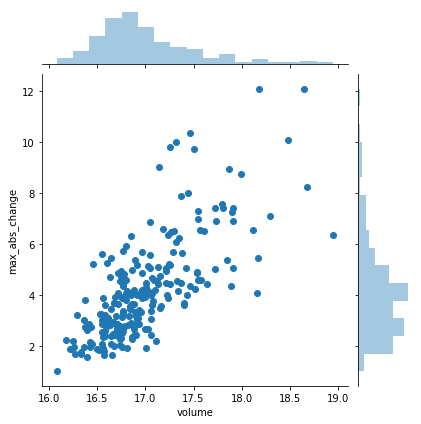

In [7]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.Volume),
        max_abs_change=fb.High - fb.Low
    )
)

By changing the `kind` argument, we can change how the center of the plot is displayed. For example, we can pass `kind='hex'` for hexbins:

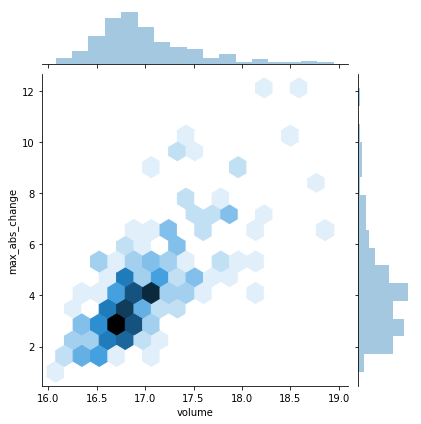

In [8]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        volume=np.log(fb.Volume),
        max_abs_change=fb.High - fb.Low
    )
)

If we specify `kind='reg'` instead, we get a regression line in the center and KDEs on the sides:

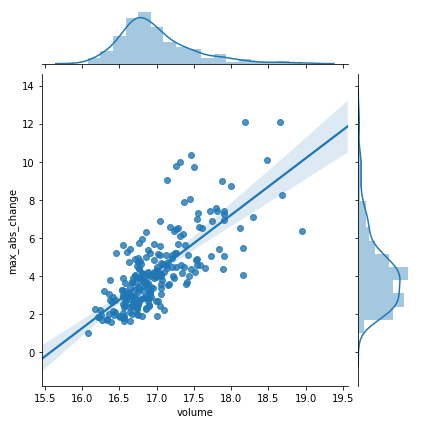

In [9]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        volume=np.log(fb.Volume),
        max_abs_change=fb.High - fb.Low
    )
)

If we pass `kind='resid'`, we get the residuals from the aforementioned regression

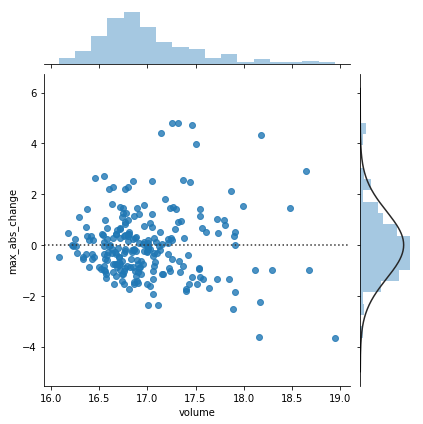

In [10]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        volume=np.log(fb.Volume),
        max_abs_change=fb.High - fb.Low
    )
)

Finally, if we pass `kind='kde'`, we get a contour plot of the joint density estimate with KDEs along the sides:

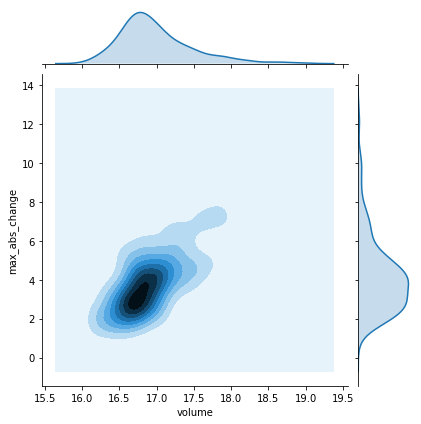

In [11]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        volume=np.log(fb.Volume),
        max_abs_change=fb.High - fb.Low
    )
)

## Regression plots
We are going to use `seaborn` to visualize a linear regression between the log of the volume traded in Facebook stock and the maximum absolute daily change (daily high stock price - daily low stock price). To do so, we first need to isolate this data:

In [12]:
fb_reg_data = fb.assign(
    volume=np.log(fb.Volume),
    max_abs_change=fb.High - fb.Low
).iloc[:,-2:]

Since we want to visualize each column as the regressor, we need to look at permutations of their order. Permutations and combinations (among other things) are made easy in Python with `itertools`, so let's import it along with the `reg_resid_plots()` function from the `reg_resid_plot.py` module in this folder:

In [13]:
import itertools
from reg_resid_plot import reg_resid_plots

The `reg_resid_plots()` function uses `regplot()` and `residplot()` from seaborn to plot the regression and residuals side-by-side:

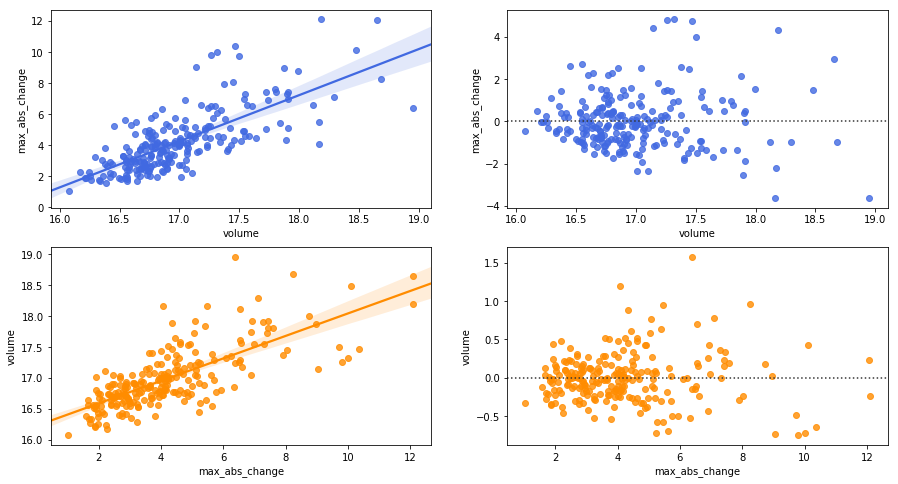

In [14]:
reg_resid_plots(fb_reg_data)

We can use `lmplot()` to split our regression across subsets of our data. For example, we can perform a regression per quarter on the Facebook stock data:

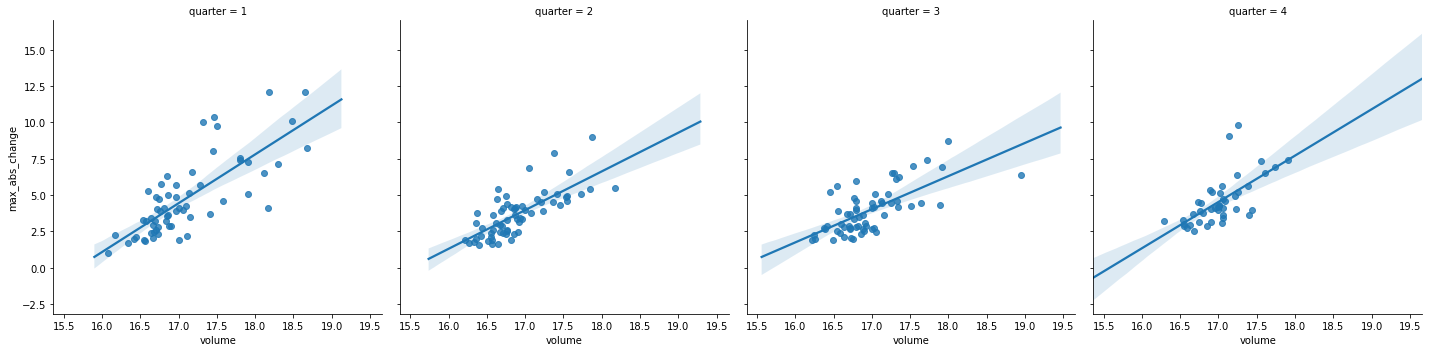

In [15]:
sns.lmplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.Volume),
        max_abs_change=fb.High - fb.Low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)

## Distributions
Seaborn provides some new plot types for visualizing distributions in additional to its own versions of the plot types we discussed in chapter 5.

### `boxenplot()`
The boxenplot is a box plot that shows additional quantiles:

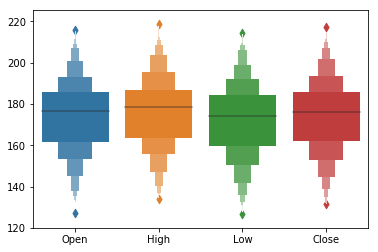

In [16]:
sns.boxenplot(data=fb.iloc[:,:4])

### `violinplot()`
Box plots lose some information about the distribution, so we can use violin plots which combine box plots and KDEs:

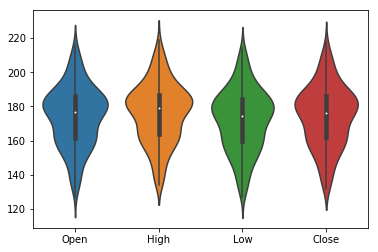

In [17]:
sns.violinplot(data=fb.iloc[:,:4])

## Faceting
We can create subplots across subsets of our data by faceting. First, we create a `FacetGrid` specifying how to layout the plots (which categorical column goes along the rows and which one along the columns). Then, we call the `map()` method of the `FacetGrid` and pass in the plotting function we want to use (along with any additional arguments).

Let's make histograms showing the distribution of earthquake magnitude in California, Alaska, and Hawaii faceted by `magType` and `parse_placed`:

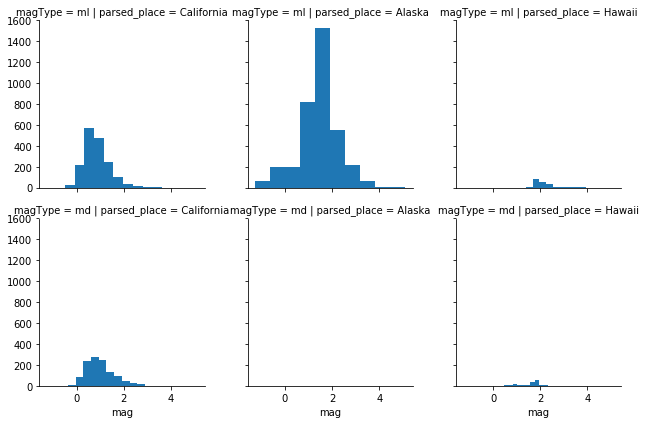

In [18]:
g = sns.FacetGrid(
    quakes[
        (quakes.parsed_place.isin([
            'California', 'Alaska', 'Hawaii'
        ]))\
        & (quakes.magType.isin(['ml', 'md']))
    ],
    row="magType",
    col="parsed_place"
)
g = g.map(plt.hist, "mag")